# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Your OpenWeatherMap API key
api_key = "8f27cd913f3dafab688b86f9f3108ab1"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | kotabumi
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | yulinshi
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | degerfors
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | tevriz
Processing Record 16 of Set 1 | flying fish cove
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | qaisumah
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | brookings
Processing Record 23

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-21.83,84,57,7.13,RU,1732514949
1,jamestown,42.0970,-79.2353,3.34,95,100,2.57,US,1732514755
2,adamstown,-25.0660,-130.1015,22.25,71,49,7.53,PN,1732514953
3,yellowknife,62.4560,-114.3525,-8.66,96,96,4.47,CA,1732514954
4,udachny,66.4167,112.4000,-24.51,80,68,6.36,RU,1732514955


In [10]:
import os

# Create the directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)

# Export the City_Data into a CSV
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-21.83,84,57,7.13,RU,1732514949
1,jamestown,42.0970,-79.2353,3.34,95,100,2.57,US,1732514755
2,adamstown,-25.0660,-130.1015,22.25,71,49,7.53,PN,1732514953
3,yellowknife,62.4560,-114.3525,-8.66,96,96,4.47,CA,1732514954
4,udachny,66.4167,112.4000,-24.51,80,68,6.36,RU,1732514955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

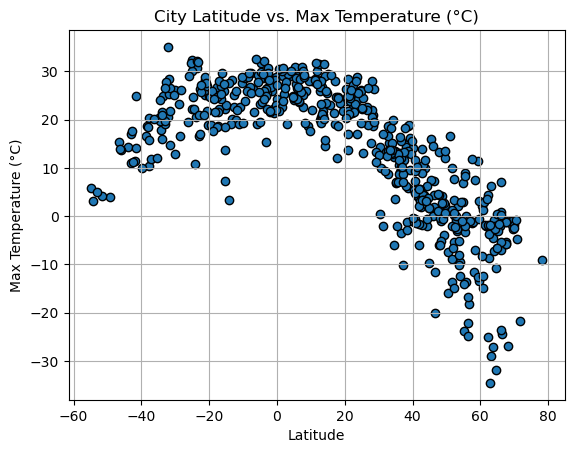

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

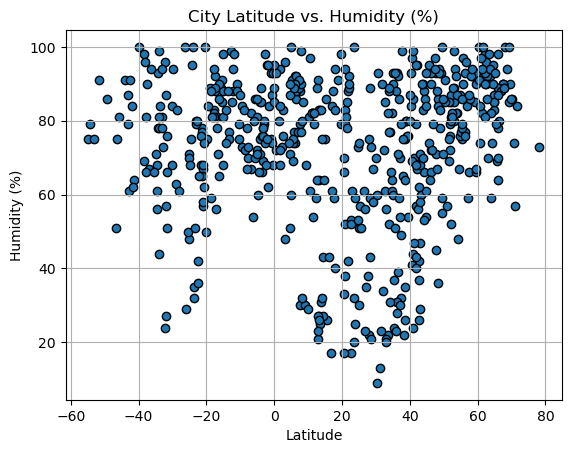

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

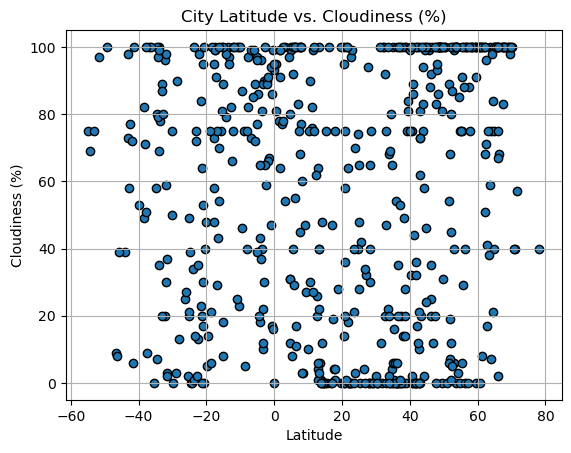

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

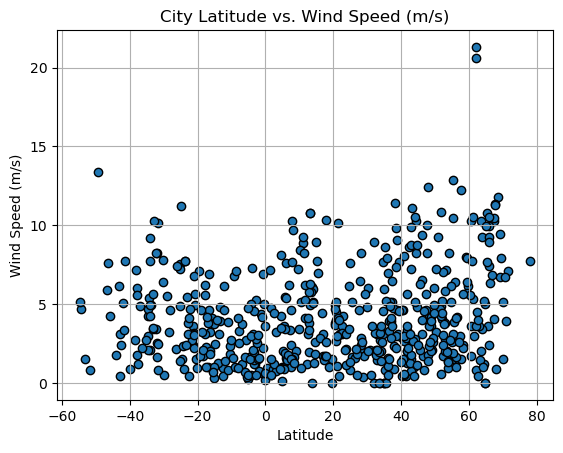

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    """
    Creates a scatter plot with a linear regression line.
    
    Parameters:
    x_values (array-like): Independent variable (e.g., Latitude).
    y_values (array-like): Dependent variable (e.g., Temperature, Humidity, etc.).
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str): Title of the plot.
    file_name (str): File name to save the plot as an image.
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_line = slope * x_values + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
    plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig(file_name)
    plt.show()

    # Print r-squared value
    print(f"The r-squared value is: {rvalue**2:.2f}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-21.83,84,57,7.13,RU,1732514949
1,jamestown,42.0970,-79.2353,3.34,95,100,2.57,US,1732514755
3,yellowknife,62.4560,-114.3525,-8.66,96,96,4.47,CA,1732514954
4,udachny,66.4167,112.4000,-24.51,80,68,6.36,RU,1732514955
6,saipan,15.1355,145.7010,29.39,86,75,7.72,MP,1732514958


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,22.25,71,49,7.53,PN,1732514953
5,port-aux-francais,-49.3500,70.2167,3.99,86,100,13.39,TF,1732514957
7,kotabumi,-4.8333,104.9000,31.64,60,86,1.66,ID,1732514960
13,puerto natales,-51.7236,-72.4875,4.08,91,97,0.83,CL,1732514969
15,flying fish cove,-10.4217,105.6791,27.66,79,100,1.83,CX,1732514972


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.73


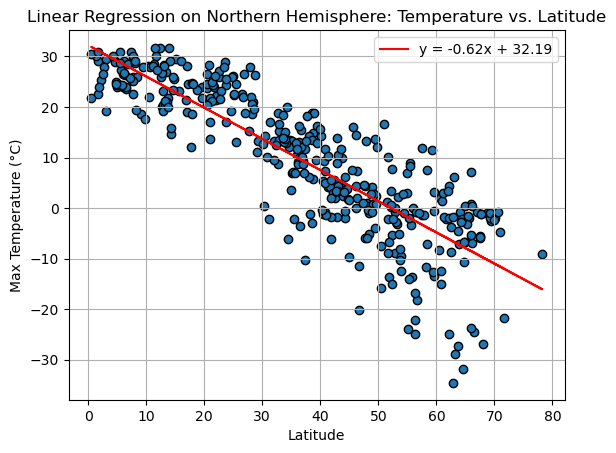

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

The r-squared value is: 0.31


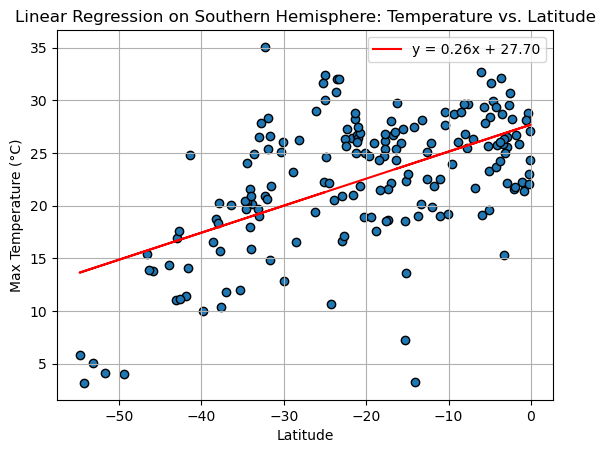

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

In the Northern Hemisphere, the linear regression shows a negative slope. This indicates that as the latitude increases (moving from the equator towards the poles), the maximum temperature decreases. This trend aligns with expectations since regions farther from the equator receive less solar energy.  An R-squared value of 0.73 indicates a moderately strong negative correlation between latitude and temperature in the Northern Hemisphere. This suggests that latitude explains approximately 73% of the variation in temperature, which aligns with the general expectation that temperature decreases as you move further from the equator.
	•	Implications: The remaining 27% of variation may be attributed to other factors, such as:
	•	Altitude: Higher altitudes generally have lower temperatures.
	•	Geographical features: Coastal cities vs. inland areas, mountain ranges, etc.
	•	Seasonal effects: Data might include temperatures from different seasons, influencing the trend.
	•	Conclusion: Despite some variability, latitude is a significant predictor of temperature in the Northern Hemisphere.
In the Southern Hemisphere, the linear regression shows a positive slope. This indicates that as the latitude increases (moving closer to the equator from negative latitudes), the maximum temperature also increases. This is again expected due to the proximity to the equator. An R-squared value of 0.31 indicates a weak positive correlation between latitude and temperature in the Southern Hemisphere. Latitude explains only 31% of the variation in temperature, meaning other factors significantly influence temperature patterns in this hemisphere.
	•	Implications: The weaker correlation may arise from:
	•	Dominance of ocean areas: The Southern Hemisphere is largely covered by oceans, which regulate temperature and reduce variability associated with latitude.
	•	Smaller landmass: The limited number of cities and geographical features for data collection could lead to less pronounced trends.
	•	Climatic variability: Factors such as ocean currents (e.g., Antarctic Circumpolar Current) and weather systems may obscure the latitude-temperature relationship.
	•	Conclusion: While there is a general increase in temperature closer to the equator, the Southern Hemisphere shows more variability, indicating that latitude alone is not a strong predictor of temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.07


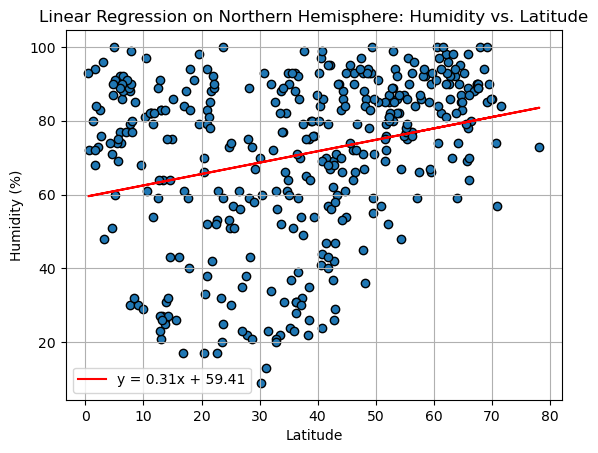

In [22]:
# Northern Hemisphere: Humidity vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

The r-squared value is: 0.01


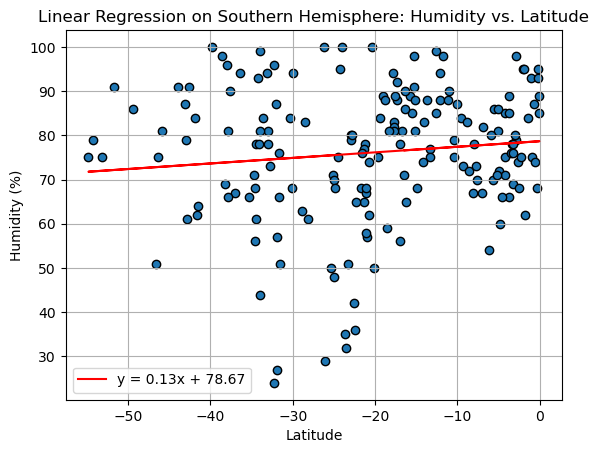

In [23]:
# Southern Hemisphere: Humidity vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

Northern: The R-squared value of 0.07 indicates a very weak relationship between latitude and humidity in the Northern Hemisphere. This suggests that latitude accounts for only 7% of the variation in humidity.
	•	Implications:
	•	Humidity does not appear to be strongly influenced by latitude in the Northern Hemisphere.
	•	Other factors, such as proximity to bodies of water, seasonal weather patterns, or local climatic conditions, likely have a greater impact on humidity.
	•	Conclusion: Latitude alone is not a significant predictor of humidity in the Northern Hemisphere.

Southern: The R-squared value of 0.01 indicates an almost negligible relationship between latitude and humidity in the Southern Hemisphere. Only 1% of the variation in humidity can be attributed to latitude.
	•	Implications:
	•	Similar to the Northern Hemisphere, other factors—like ocean currents, altitude, and local geography—play a dominant role in determining humidity levels.
	•	The Southern Hemisphere’s extensive ocean coverage may further obscure any latitude-based trends.
	•	Conclusion: Humidity is effectively independent of latitude in the Southern Hemisphere.

In both hemispheres, the relationship between latitude and humidity is extremely weak, as reflected by the low R-squared values.
Humidity is influenced by factors like proximity to water bodies, prevailing wind patterns, and regional climate systems, rather than latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.05


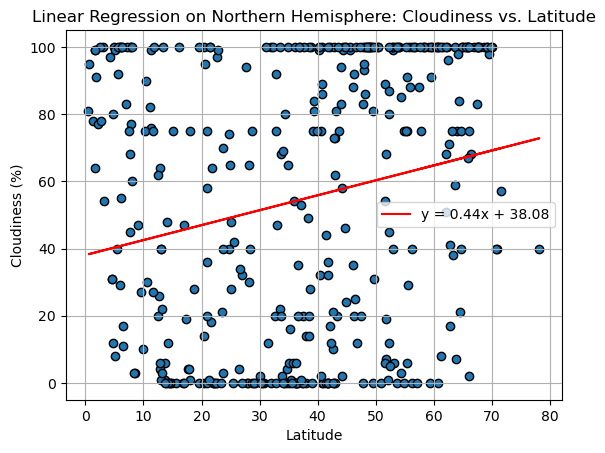

In [24]:
# Northern Hemisphere: Cloudiness vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

The r-squared value is: 0.01


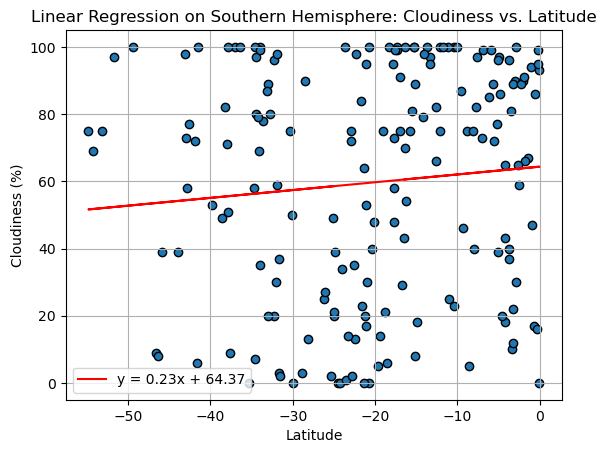

In [25]:
# Southern Hemisphere: Cloudiness vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Southern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

Northern Hemisphere (R² = 0.05): An R-squared value of 0.05 indicates a very weak relationship between latitude and cloudiness in the Northern Hemisphere. Latitude explains only 5% of the variation in cloudiness. The weak correlation suggests that cloudiness is not significantly influenced by latitude in the Northern Hemisphere. Latitude has negligible predictive power for cloudiness in the Northern Hemisphere.
Southern Hemisphere (R² = 0.01): An R-squared value of 0.01 indicates an almost non-existent relationship between latitude and cloudiness in the Southern Hemisphere. Latitude explains only 1% of the variation in cloudiness. Cloudiness is almost entirely independent of latitude in the Southern Hemisphere. Factors such as oceanic influences, trade winds, and localized weather systems likely play a much more significant role in cloudiness variation. The relationship between latitude and cloudiness in the Southern Hemisphere is negligible.
The very low R-squared values for both hemispheres indicate that latitude alone is not a meaningful factor in explaining cloudiness variability.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.05


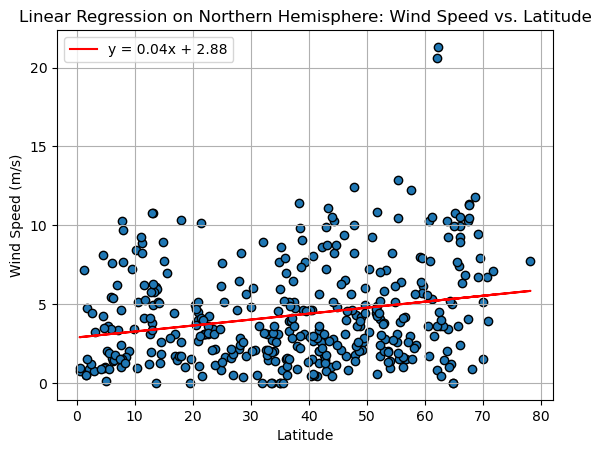

In [26]:
# Northern Hemisphere: Wind Speed vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

The r-squared value is: 0.11


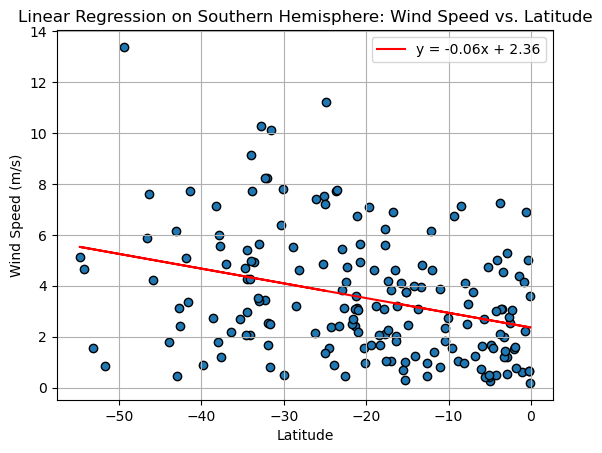

In [27]:
# Southern Hemisphere: Wind Speed vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create the scatter plot with regression line
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1)
plt.plot(x_values, regress_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add graph properties
plt.title("Linear Regression on Southern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)

# Show r-squared value in console
print(f"The r-squared value is: {rvalue**2:.2f}")

# Show plot
plt.show()

Northern Hemisphere (R² = 0.05): The R-squared value of 0.05 indicates a very weak relationship between latitude and wind speed in the Northern Hemisphere. Only 5% of the variation in wind speed can be attributed to latitude. Wind speed in the Northern Hemisphere is not strongly influenced by latitude. Other factors, such as local weather systems, geography (e.g., mountains and valleys), and proximity to oceans, likely play a much larger role in determining wind speed.
Southern Hemisphere (R² = 0.11): The R-squared value of 0.11 indicates a slightly stronger but still weak relationship between latitude and wind speed in the Southern Hemisphere. Latitude explains only 11% of the variation in wind speed. The slightly stronger correlation compared to the Northern Hemisphere might be due to the Southern Hemisphere’s large ocean coverage, where global wind patterns (e.g., trade winds, westerlies) are less interrupted by landmasses. However, the majority of wind speed variability is still determined by other factors such as ocean currents and regional weather systems.
The low R-squared values suggest that latitude is not a primary factor influencing wind speed in either hemisphere. Local atmospheric conditions, geography, and seasonal patterns play a much larger role in determining wind speed than latitude.